<a href="https://colab.research.google.com/github/Auzek2002/IBA_DataThon_2.0_Round_1/blob/main/DataThon_2_0_Round_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libs:**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras import datasets,layers,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,GlobalAveragePooling2D
from zipfile import ZipFile
import os,glob
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from keras.models import Model
from keras.layers import BatchNormalization
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# **Loading the DataSet:**

In [ ]:
df = pd.read_csv('/content/train_data.csv')

# **Exploaring the DataSet:**

In [ ]:
df.head()

,Investor_ID,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor,Investment_Failed
0,0003HW9UAA,51.0,NaN,87300.0,358,13,3.0,18.10,12,0.85,Bachelor's,Part-time,NaN,No,NO,Other,True,0
1,000ELHLBPV,37.0,81658.0,152598.0,792,23,4.0,14.06,24,0.86,PhD,Self-employed,NaN,Yes,No,Auto,False,1
2,000G6CHJON,NaN,NaN,77767.0,359,57,4.0,4.31,60,0.60,Master's,Unemployed,Married,No,No,Education,True,0
3,000K09D0JB,54.0,42344.0,13261.0,366,115,1.0,NaN,60,0.21,PhD,Part-time,Divorced,No,No,Education,True,0
4,000NTH4YTU,63.0,48898.0,193990.0,792,53,4.0,5.65,48,0.82,Master's,Self-employed,Married,Yes,No,Business,True,0


In [ ]:
df.tail()

,Investor_ID,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor,Investment_Failed
225342,ZZZHT6VWO4,37.0,25394.0,NaN,527,12,2.0,NaN,24,0.17,Bachelor's,Unemployed,Married,Ye,Maybe,Education,False,1
225343,ZZZI5YOV9G,32.0,101616.0,101862.0,628,32,2.0,17.45,12,0.38,High School,Full-time,Single,Yes,no,Education,False,1
225344,ZZZMFPZFKE,NaN,102495.0,140375.0,764,82,4.0,23.82,24,0.63,High School,Full-time,Divorced,yes,No,Other,False,0
225345,ZZZV1HB132,69.0,143661.0,157929.0,407,38,4.0,6.07,60,0.33,Master's,Part-time,Divorced,Yes,Yes,Home,False,0
225346,ZZZX015LV2,65.0,114515.0,95500.0,820,45,4.0,8.87,48,0.13,High School,Full-time,Single,no,No,Business,False,0


In [ ]:
df.shape

(225347, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225347 entries, 0 to 225346
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Investor_ID                     225347 non-null  object 
 1   Age                             192507 non-null  float64
 2   Annual_Income                   202721 non-null  float64
 3   Investment_Amount               207314 non-null  float64
 4   Risk_Tolerance_Score            225347 non-null  int64  
 5   Months_of_Investing_Experience  225347 non-null  int64  
 6   Number_of_Active_Investments    220835 non-null  float64
 7   Potential_Return_Rate           214103 non-null  float64
 8   Investment_Duration             225347 non-null  int64  
 9   Investment_to_Income_Ratio      225347 non-null  float64
 10  Education                       225347 non-null  object 
 11  Employment_Status               225347 non-null  object 
 12  Marital_Status  

In [ ]:
df.describe()

,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Investment_Failed
count,192507.000000,202721.000000,207314.000000,225347.000000,225347.000000,220835.000000,214103.000000,225347.000000,225347.000000,225347.000000
mean,46.026004,82793.709196,126997.235204,598.569708,59.832942,2.498413,13.417184,36.028756,0.499736,0.087212
std,19.066572,38856.728908,70766.875540,186.348988,34.617474,1.116728,6.628983,16.968128,0.230821,0.282146
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,49293.000000,65589.250000,445.000000,30.000000,2.000000,7.700000,24.000000,0.300000,0.000000
50%,45.000000,82908.000000,126790.500000,589.000000,60.000000,2.000000,13.350000,36.000000,0.500000,0.000000
75%,58.000000,116369.000000,188104.500000,735.000000,90.000000,3.000000,19.160000,48.000000,0.700000,0.000000
max,119.000000,149999.000000,249999.000000,1099.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


# **Data Cleaning:**

In [ ]:
df['Has_Dependents'].unique()

array(['NO', 'No', 'Yes', 'no', 'YES', 'yes', 'Ye', 'YE', 'ye', 'Maybe',
       'Unknown'], dtype=object)

In [ ]:
df['Has_Dependents'] = df['Has_Dependents'].str.upper()  # Convert all values to uppercase
df['Has_Dependents'] = df['Has_Dependents'].replace({'YES': 'YES','YE': 'YES', 'NO': 'NO', 'UNKNOWN': None, 'MAYBE': None})

In [ ]:
df['Has_Dependents'].unique()

array(['NO', 'YES', None], dtype=object)

In [ ]:
df['Owns_Property'].unique()

array(['No', 'Yes', 'NO', 'yes', 'no', 'YES', 'Ye', 'YE', 'Unknown',
       'Maybe', 'ye'], dtype=object)

In [ ]:
df['Owns_Property'] = df['Owns_Property'].str.upper()  # Convert all values to uppercase
df['Owns_Property'] = df['Owns_Property'].replace({'YES': 'YES','YE': 'YES', 'NO': 'NO', 'UNKNOWN': None, 'MAYBE': None})

In [ ]:
df['Owns_Property'].unique()

array(['NO', 'YES', None], dtype=object)

In [ ]:
df['Education'].unique()

array(["Bachelor's", 'PhD', "Master's", 'High School'], dtype=object)

In [ ]:
df['Employment_Status'].unique()

array(['Part-time', 'Self-employed', 'Unemployed', 'Full-time', 'Full',
       'Self', 'Unem', 'Retired', 'Part'], dtype=object)

In [ ]:
df['Employment_Status'] = df['Employment_Status'].replace({'Part': 'Part-time','Self': 'Self-employed', 'Unem': 'Unemployed','Full':'Full-time'})

In [ ]:
df['Employment_Status'].unique()

array(['Part-time', 'Self-employed', 'Unemployed', 'Full-time', 'Retired'],
      dtype=object)

In [ ]:
df['Marital_Status'].unique()

array([nan, 'Married', 'Divorced', 'Sgl', 'Single', 'Div', 'Marr'],
      dtype=object)

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace({'Sgl': 'Single','Div': 'Divorced', 'Marr': 'Married','nan':None})

In [ ]:
df['Marital_Status'].unique()

array([nan, 'Married', 'Divorced', 'Single'], dtype=object)

In [ ]:
df['Investment_Sector'].unique()

array(['Other', 'Auto', 'Education', 'Business', 'Home'], dtype=object)

In [ ]:
df['Has_Investment_Advisor'].unique()

array([True, False, nan], dtype=object)

In [ ]:
df.head()

,Investor_ID,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor,Investment_Failed
0,0003HW9UAA,51.0,NaN,87300.0,358,13,3.0,18.10,12,0.85,Bachelor's,Part-time,NaN,NO,NO,Other,True,0
1,000ELHLBPV,37.0,81658.0,152598.0,792,23,4.0,14.06,24,0.86,PhD,Self-employed,NaN,YES,NO,Auto,False,1
2,000G6CHJON,NaN,NaN,77767.0,359,57,4.0,4.31,60,0.60,Master's,Unemployed,Married,NO,NO,Education,True,0
3,000K09D0JB,54.0,42344.0,13261.0,366,115,1.0,NaN,60,0.21,PhD,Part-time,Divorced,NO,NO,Education,True,0
4,000NTH4YTU,63.0,48898.0,193990.0,792,53,4.0,5.65,48,0.82,Master's,Self-employed,Married,YES,NO,Business,True,0


# **Removing NULL values:**

In [ ]:
df.shape

(225347, 18)

In [ ]:
df.isnull().sum()

Investor_ID                           0
Age                               32840
Annual_Income                     22626
Investment_Amount                 18033
Risk_Tolerance_Score                  0
Months_of_Investing_Experience        0
Number_of_Active_Investments       4512
Potential_Return_Rate             11244
Investment_Duration                   0
Investment_to_Income_Ratio            0
Education                             0
Employment_Status                     0
Marital_Status                    42906
Owns_Property                      3404
Has_Dependents                     3456
Investment_Sector                     0
Has_Investment_Advisor             3849
Investment_Failed                     0
dtype: int64

In [ ]:
df_1 = df
cols = df_1.columns
for col in cols:
  if df_1[col].dtype == 'O':
    df_1[col].fillna(value=df_1[col].mode()[0],inplace=True)
  else:
    df_1[col].fillna(value=df_1[col].mean(),inplace=True)

In [ ]:
df_1.isnull().sum()

Investor_ID                       0
Age                               0
Annual_Income                     0
Investment_Amount                 0
Risk_Tolerance_Score              0
Months_of_Investing_Experience    0
Number_of_Active_Investments      0
Potential_Return_Rate             0
Investment_Duration               0
Investment_to_Income_Ratio        0
Education                         0
Employment_Status                 0
Marital_Status                    0
Owns_Property                     0
Has_Dependents                    0
Investment_Sector                 0
Has_Investment_Advisor            0
Investment_Failed                 0
dtype: int64

In [ ]:
df_1.head()

,Investor_ID,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor,Investment_Failed
0,0003HW9UAA,51.000000,82793.709196,87300.0,358,13,3.0,18.100000,12,0.85,Bachelor's,Part-time,Divorced,NO,NO,Other,True,0
1,000ELHLBPV,37.000000,81658.000000,152598.0,792,23,4.0,14.060000,24,0.86,PhD,Self-employed,Divorced,YES,NO,Auto,False,1
2,000G6CHJON,46.026004,82793.709196,77767.0,359,57,4.0,4.310000,60,0.60,Master's,Unemployed,Married,NO,NO,Education,True,0
3,000K09D0JB,54.000000,42344.000000,13261.0,366,115,1.0,13.417184,60,0.21,PhD,Part-time,Divorced,NO,NO,Education,True,0
4,000NTH4YTU,63.000000,48898.000000,193990.0,792,53,4.0,5.650000,48,0.82,Master's,Self-employed,Married,YES,NO,Business,True,0


In [ ]:
df_1['Age'] = df_1['Age'].round()

In [ ]:
df_1.head()

,Investor_ID,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor,Investment_Failed
0,0003HW9UAA,51.0,82793.709196,87300.0,358,13,3.0,18.100000,12,0.85,Bachelor's,Part-time,Divorced,NO,NO,Other,True,0
1,000ELHLBPV,37.0,81658.000000,152598.0,792,23,4.0,14.060000,24,0.86,PhD,Self-employed,Divorced,YES,NO,Auto,False,1
2,000G6CHJON,46.0,82793.709196,77767.0,359,57,4.0,4.310000,60,0.60,Master's,Unemployed,Married,NO,NO,Education,True,0
3,000K09D0JB,54.0,42344.000000,13261.0,366,115,1.0,13.417184,60,0.21,PhD,Part-time,Divorced,NO,NO,Education,True,0
4,000NTH4YTU,63.0,48898.000000,193990.0,792,53,4.0,5.650000,48,0.82,Master's,Self-employed,Married,YES,NO,Business,True,0


In [ ]:
df_1.to_csv('/content/Transformed_DataSet.csv',index=False)

# **Checking if Data is balanced:**

In [ ]:
df['Investment_Failed'].unique()

array([0, 1])

In [ ]:
df['Investment_Failed'].value_counts()

Investment_Failed
0    205694
1     19653
Name: count, dtype: int64

<Axes: xlabel='Investment_Failed', ylabel='count'>

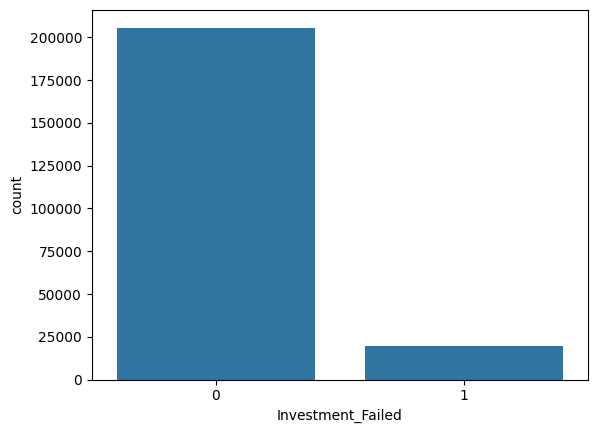

In [ ]:
sns.countplot(x='Investment_Failed',data=df)

# **Data is not balanced!**

# **Lable Encoding:**

# **Ordinal Encoding:**

In [ ]:
encoder = LabelEncoder()
encoder.fit(df_1['Education'])
df_1['Education'] = encoder.transform(df_1['Education'])

# **Encoding:**

In [ ]:
encoder = LabelEncoder()
encoder.fit(df_1['Owns_Property'])
df_1['Owns_Property'] = encoder.transform(df_1['Owns_Property'])

In [ ]:
encoder = LabelEncoder()
encoder.fit(df_1['Has_Dependents'])
df_1['Has_Dependents'] = encoder.transform(df_1['Has_Dependents'])

In [ ]:
df_1['Has_Investment_Advisor'] = df_1['Has_Investment_Advisor'].astype('bool')

# **One hot Encoding for Non-Ordinal features:**

In [ ]:
# Perform one-hot encoding
df_1 = pd.get_dummies(df_1, columns=['Employment_Status'], prefix='Employment')
df_1 = pd.get_dummies(df_1, columns=['Investment_Sector'], prefix='Investment')
df_1 = pd.get_dummies(df_1, columns=['Marital_Status'], prefix='Marital')


In [ ]:
df_1.columns

Index(['Investor_ID', 'Age', 'Annual_Income', 'Investment_Amount',
       'Risk_Tolerance_Score', 'Months_of_Investing_Experience',
       'Number_of_Active_Investments', 'Potential_Return_Rate',
       'Investment_Duration', 'Investment_to_Income_Ratio', 'Education',
       'Owns_Property', 'Has_Dependents', 'Has_Investment_Advisor',
       'Investment_Failed', 'Employment_Full-time', 'Employment_Part-time',
       'Employment_Retired', 'Employment_Self-employed',
       'Employment_Unemployed', 'Investment_Auto', 'Investment_Business',
       'Investment_Education', 'Investment_Home', 'Investment_Other',
       'Marital_Divorced', 'Marital_Married', 'Marital_Single'],
      dtype='object')

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225347 entries, 0 to 225346
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Investor_ID                     225347 non-null  object 
 1   Age                             225347 non-null  float64
 2   Annual_Income                   225347 non-null  float64
 3   Investment_Amount               225347 non-null  float64
 4   Risk_Tolerance_Score            225347 non-null  int64  
 5   Months_of_Investing_Experience  225347 non-null  int64  
 6   Number_of_Active_Investments    225347 non-null  float64
 7   Potential_Return_Rate           225347 non-null  float64
 8   Investment_Duration             225347 non-null  int64  
 9   Investment_to_Income_Ratio      225347 non-null  float64
 10  Education                       225347 non-null  int64  
 11  Owns_Property                   225347 non-null  int64  
 12  Has_Dependents  

In [ ]:
df_1.head()

,Investor_ID,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,...,Employment_Self-employed,Employment_Unemployed,Investment_Auto,Investment_Business,Investment_Education,Investment_Home,Investment_Other,Marital_Divorced,Marital_Married,Marital_Single
0,0003HW9UAA,51.0,82793.709196,87300.0,358,13,3.0,18.100000,12,0.85,...,False,False,False,False,False,False,True,True,False,False
1,000ELHLBPV,37.0,81658.000000,152598.0,792,23,4.0,14.060000,24,0.86,...,True,False,True,False,False,False,False,True,False,False
2,000G6CHJON,46.0,82793.709196,77767.0,359,57,4.0,4.310000,60,0.60,...,False,True,False,False,True,False,False,False,True,False
3,000K09D0JB,54.0,42344.000000,13261.0,366,115,1.0,13.417184,60,0.21,...,False,False,False,False,True,False,False,True,False,False
4,000NTH4YTU,63.0,48898.000000,193990.0,792,53,4.0,5.650000,48,0.82,...,True,False,False,True,False,False,False,False,True,False


In [ ]:
df_1.to_csv('/content/Transformed_DataSet_1.0.csv',index=False)

In [ ]:
df_1.drop(['Investor_ID'],axis=1,inplace=True)

# **Check Correlation**

<Axes: >

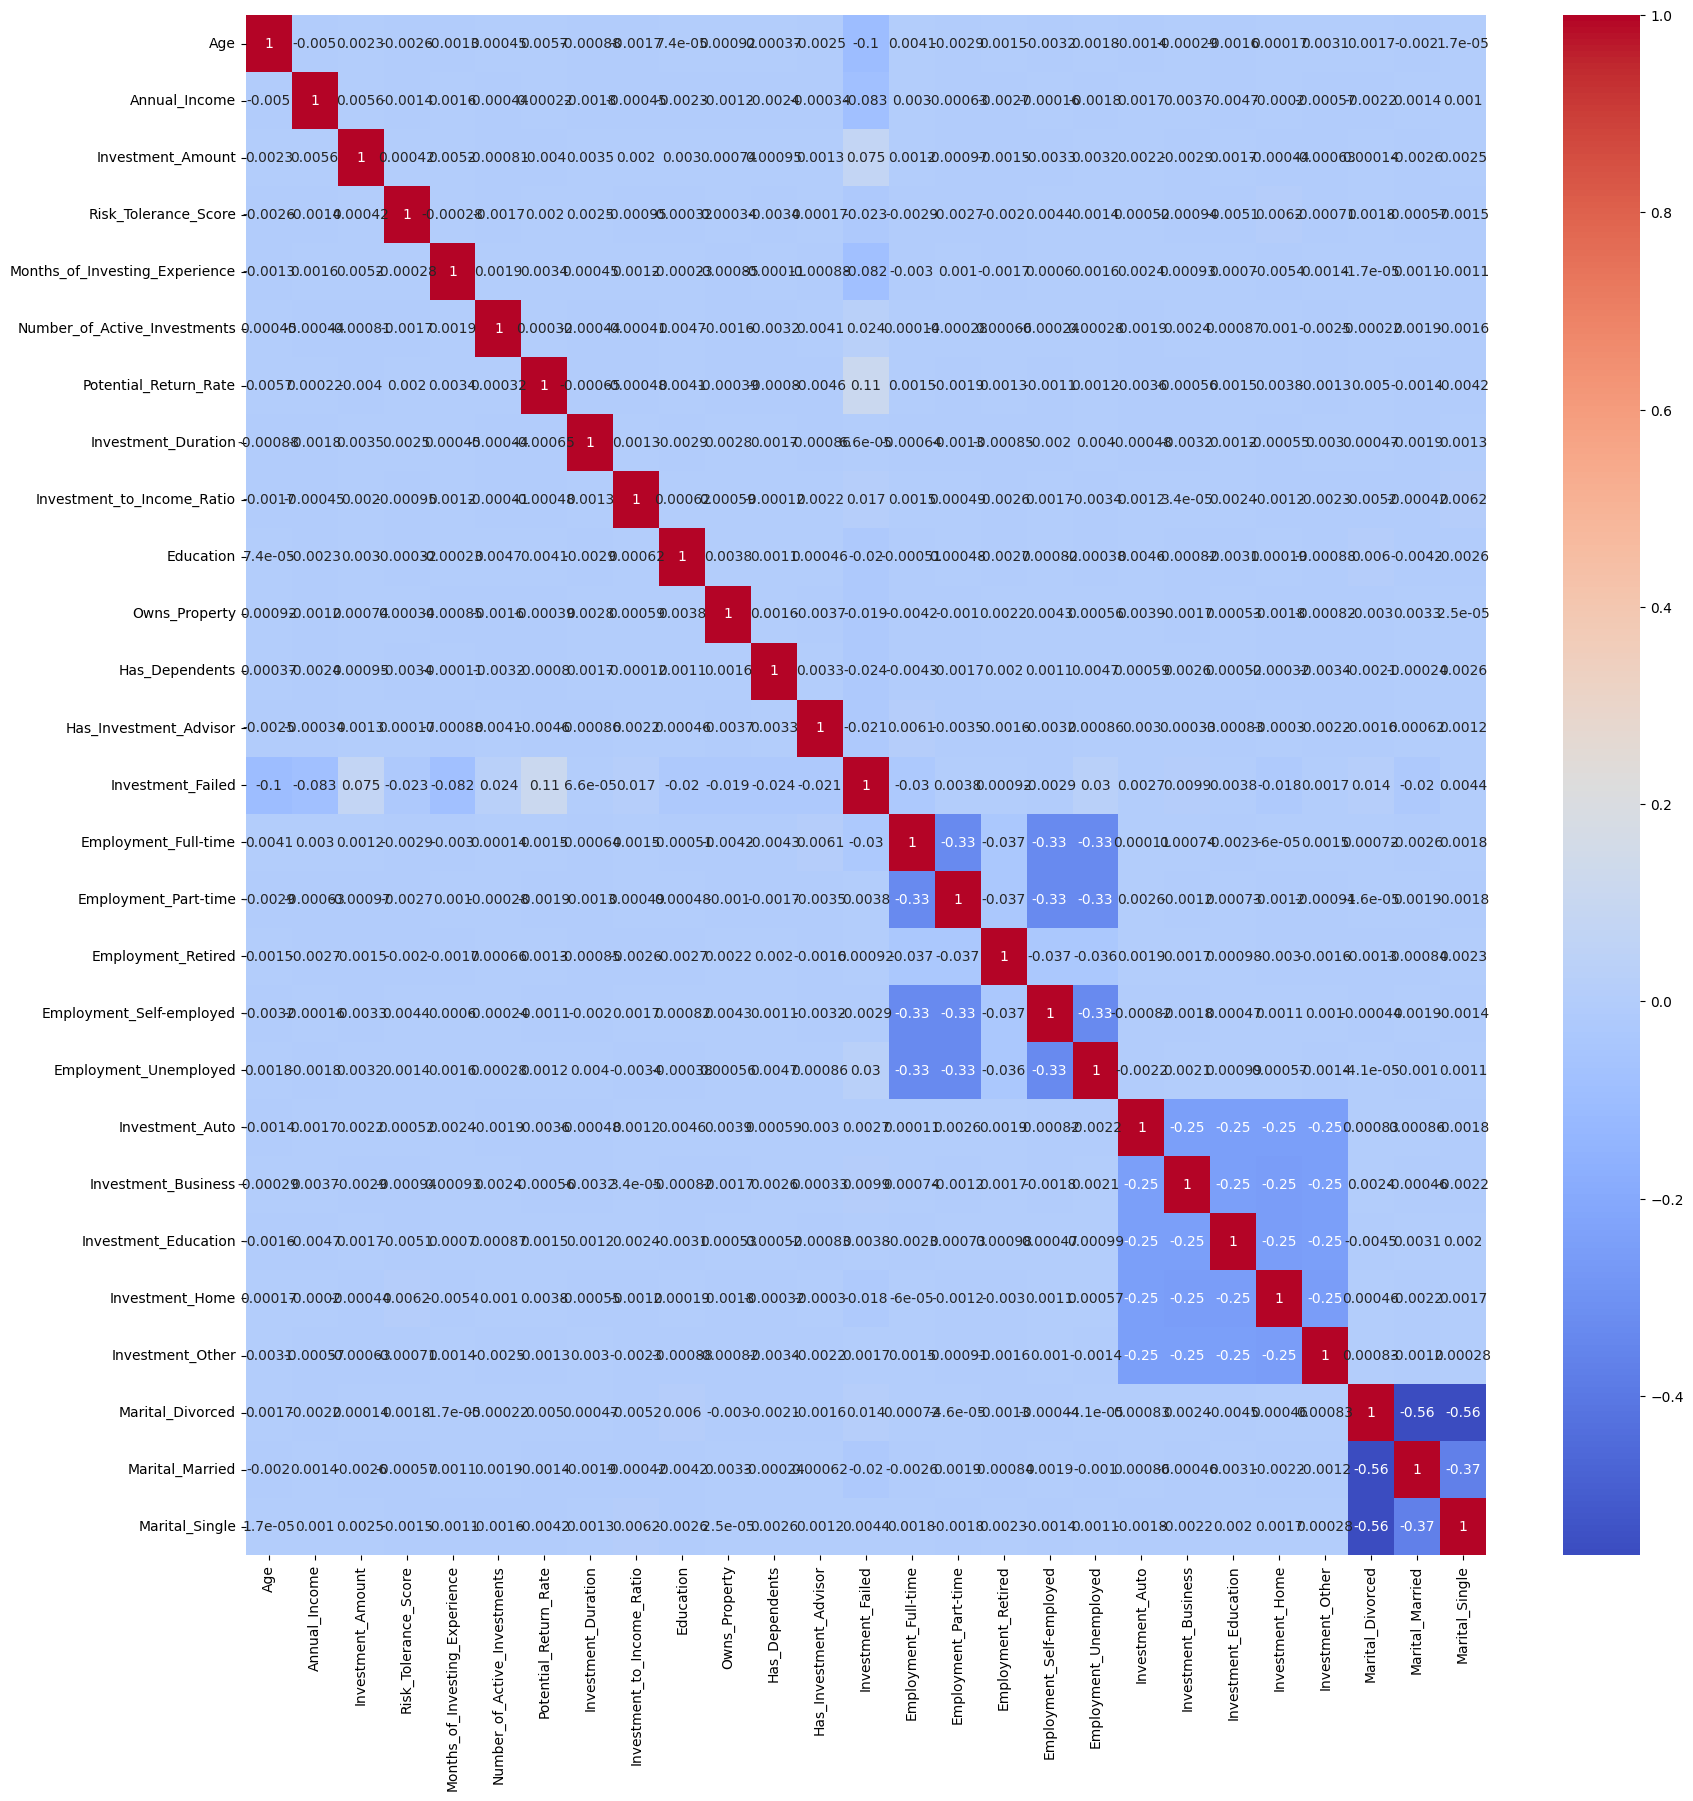

In [ ]:
corr = df_1.corr()
corr = df_1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot = True , cmap = "coolwarm")

# **Checking Feature Importance:**

In [ ]:
x = df_1.drop(['Investment_Failed'],axis=1)
y = df_1['Investment_Failed']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Feature 0: 0.010816
Feature 5: 0.007093
Feature 6: 0.007197
Feature 9: 0.007949
Feature 10: 0.025900
Feature 11: 0.026594
Feature 12: 0.025838
Feature 13: 0.006603
Feature 16: 0.006450
Feature 23: 0.021118
Feature 24: 0.006954
Feature 25: 0.007138


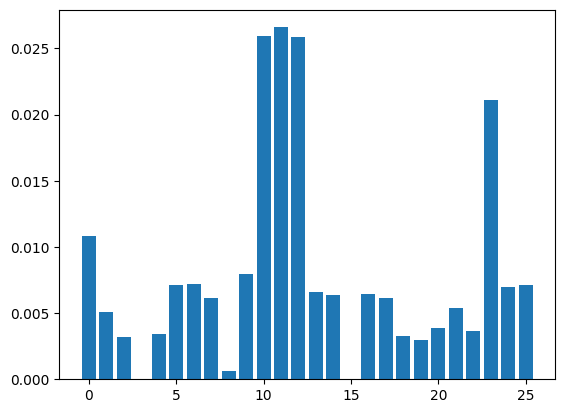

Selected Features: Index(['Age', 'Number_of_Active_Investments', 'Potential_Return_Rate',
       'Education', 'Owns_Property', 'Has_Dependents',
       'Has_Investment_Advisor', 'Investment_Failed', 'Employment_Retired',
       'Investment_Other', 'Marital_Divorced', 'Marital_Married'],
      dtype='object')


In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2,mutual_info_classif
# fs = SelectKBest(score_func=mutual_info_classif, k='all')
# fs.fit(x_train, y_train)
# X_train_fs = fs.transform(x_train)
# X_test_fs = fs.transform(x_test)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

fs = SelectKBest(score_func=mutual_info_classif, k=12)
fs.fit(x_train, y_train)
X_train_fs = fs.transform(x_train)
X_test_fs = fs.transform(x_test)

selected_features_1 = []
for i in range(len(fs.scores_)):
    if fs.get_support()[i]:
        selected_features_1.append(i)
        print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()
selected_features_1 = df_1.columns[selected_features_1]
print("Selected Features:", selected_features_1)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
sfm = SelectFromModel(model, threshold='median')  # Select features based on median importance
sfm.fit(x_train, y_train)

# Get the indices of the selected features
selected_feature_indices = sfm.get_support(indices=True)

# Get the names of the selected features
selected_features = df_1.columns[selected_feature_indices]
print("Selected Features:", selected_features)


Selected Features: Index(['Age', 'Annual_Income', 'Investment_Amount', 'Risk_Tolerance_Score',
       'Months_of_Investing_Experience', 'Number_of_Active_Investments',
       'Potential_Return_Rate', 'Investment_Duration',
       'Investment_to_Income_Ratio', 'Education', 'Owns_Property',
       'Has_Dependents', 'Has_Investment_Advisor'],
      dtype='object')


In [ ]:
df_1.columns

Index(['Age', 'Annual_Income', 'Investment_Amount', 'Risk_Tolerance_Score',
       'Months_of_Investing_Experience', 'Number_of_Active_Investments',
       'Potential_Return_Rate', 'Investment_Duration',
       'Investment_to_Income_Ratio', 'Education', 'Owns_Property',
       'Has_Dependents', 'Has_Investment_Advisor', 'Investment_Failed',
       'Employment_Full-time', 'Employment_Part-time', 'Employment_Retired',
       'Employment_Self-employed', 'Employment_Unemployed', 'Investment_Auto',
       'Investment_Business', 'Investment_Education', 'Investment_Home',
       'Investment_Other', 'Marital_Divorced', 'Marital_Married',
       'Marital_Single'],
      dtype='object')

In [ ]:
common_elements = set(selected_features_1).intersection(set(selected_features))
print("Common Elements:", list(common_elements))
common_elements = list(common_elements)
# 'Investment_to_Income_Ratio', 'Risk_Tolerance_Score', 'Months_of_Investing_Experience'

Common Elements: ['Has_Dependents', 'Age', 'Has_Investment_Advisor', 'Education', 'Potential_Return_Rate', 'Number_of_Active_Investments', 'Owns_Property']


In [ ]:
new_features = ['Investment_to_Income_Ratio', 'Risk_Tolerance_Score', 'Months_of_Investing_Experience','Marital_Married','Marital_Single']
common_elements.append('Investment_to_Income_Ratio')
common_elements.append('Risk_Tolerance_Score')
common_elements.append('Months_of_Investing_Experience')
common_elements.append('Marital_Married')
common_elements.append('Marital_Single')
len(common_elements)

12

In [ ]:
common_elements

['Has_Dependents',
 'Age',
 'Has_Investment_Advisor',
 'Education',
 'Potential_Return_Rate',
 'Number_of_Active_Investments',
 'Owns_Property',
 'Investment_to_Income_Ratio',
 'Risk_Tolerance_Score',
 'Months_of_Investing_Experience',
 'Marital_Married',
 'Marital_Single']

In [ ]:
x_1 = df_1[common_elements]
y_1 = df_1['Investment_Failed']

In [ ]:
x_1.head()

,Has_Dependents,Age,Has_Investment_Advisor,Education,Potential_Return_Rate,Number_of_Active_Investments,Owns_Property,Investment_to_Income_Ratio,Risk_Tolerance_Score,Months_of_Investing_Experience,Marital_Married,Marital_Single
0,0,51.0,True,0,18.100000,3.0,0,0.85,358,13,False,False
1,0,37.0,False,3,14.060000,4.0,1,0.86,792,23,False,False
2,0,46.0,True,2,4.310000,4.0,0,0.60,359,57,True,False
3,0,54.0,True,3,13.417184,1.0,0,0.21,366,115,False,False
4,0,63.0,True,2,5.650000,4.0,1,0.82,792,53,True,False


# **Solving Imbalance Problem:**

# **Before OverSampling:**

In [ ]:
y_1.value_counts()

Investment_Failed
0    205694
1     19653
Name: count, dtype: int64

<Axes: xlabel='Investment_Failed', ylabel='count'>

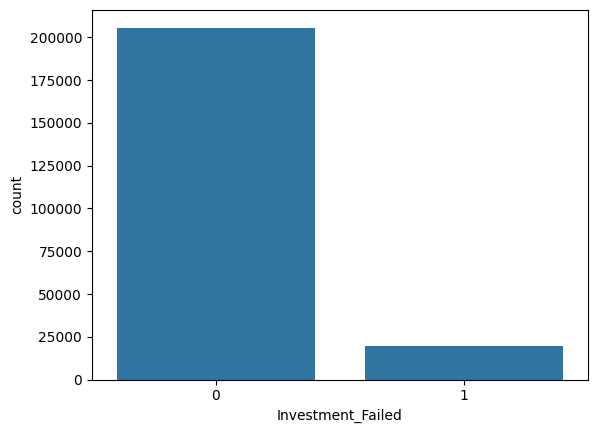

In [ ]:
sns.countplot(x=y_1)

# **After OverSampling:**

In [ ]:
x_sampled, y_sampled = SMOTE().fit_resample(x_1,y_1)

In [ ]:
y_sampled.value_counts()

Investment_Failed
0    205694
1    205694
Name: count, dtype: int64

<Axes: xlabel='Investment_Failed', ylabel='count'>

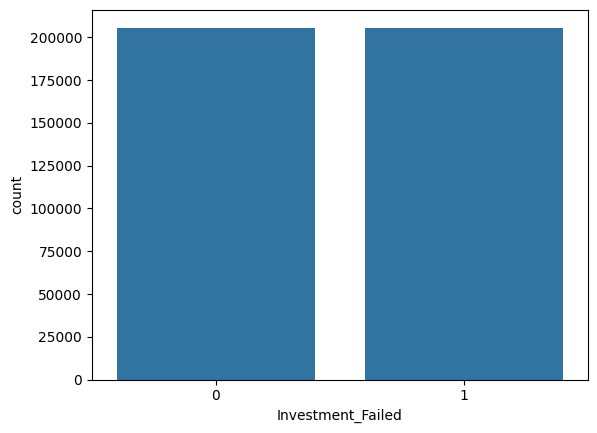

In [ ]:
sns.countplot(x=y_sampled)

# **Scaling the Data:**

In [ ]:
scaler = StandardScaler()

In [ ]:
x_sampled.shape
y_sampled.shape

(411388,)

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size=0.3,random_state=3)
print(f"Shape of x_train: {x_train.shape}\n, Shape of x_test: {x_test.shape}\n, Shape of y_train: {y_train.shape}\n, Shape of y_test: {y_test.shape}\n")

Shape of x_train: (287971, 12)
, Shape of x_test: (123417, 12)
, Shape of y_train: (287971,)
, Shape of y_test: (123417,)



In [ ]:
x_train.head()

,Has_Dependents,Age,Has_Investment_Advisor,Education,Potential_Return_Rate,Number_of_Active_Investments,Owns_Property,Investment_to_Income_Ratio,Risk_Tolerance_Score,Months_of_Investing_Experience,Marital_Married,Marital_Single
269197,0,35.183105,False,0,24.339633,2.0,0,0.555126,695,11,True,False
25517,1,25.000000,True,1,12.320000,1.0,1,0.110000,637,24,True,False
20078,1,46.000000,True,3,7.330000,3.0,0,0.280000,778,65,False,False
300868,1,41.832513,True,1,17.279224,3.0,0,0.879372,1092,4,True,False
49564,0,51.000000,False,2,18.170000,3.0,0,0.570000,506,107,True,False


In [ ]:
x_test.head()

,Has_Dependents,Age,Has_Investment_Advisor,Education,Potential_Return_Rate,Number_of_Active_Investments,Owns_Property,Investment_to_Income_Ratio,Risk_Tolerance_Score,Months_of_Investing_Experience,Marital_Married,Marital_Single
225845,0,46.000000,False,1,7.023054,3.840096,0,0.839491,637,38,False,True
118160,1,42.000000,True,3,5.210000,3.000000,1,0.330000,302,84,False,False
261141,0,46.000000,True,1,5.433760,1.000000,0,0.544432,580,7,True,False
275068,0,21.424964,True,1,7.851885,1.575036,0,0.526999,451,97,False,True
284283,0,53.169338,True,2,18.059561,2.169338,0,0.503592,814,54,True,False


In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train.max()

4.25106217476949

In [ ]:
x_train.min()

-2.0033669840662536

In [ ]:
x_test.max()

4.25106217476949

In [ ]:
x_test.min()

-2.0033669840662536

# **SVC:**

In [ ]:
fraction = 0.3  # Fraction of data to keep, e.g., 30%

# Creating smaller subsets of x_train, y_train, x_test, y_test
x_train_small, _, y_train_small, _ = train_test_split(x_train, y_train, test_size=1-fraction, random_state=42)
x_test_small, _, y_test_small, _ = train_test_split(x_test, y_test, test_size=1-fraction, random_state=42)

In [ ]:
print(f"Shape of x_train_small: {x_train_small.shape}\n, Shape of x_test_small: {x_test_small.shape}\n, Shape of y_train_small: {y_train_small.shape}\n, Shape of y_test_small: {y_test_small.shape}\n")

Shape of x_train_small: (61708, 10)
, Shape of x_test_small: (61708, 10)
, Shape of y_train_small: (61708,)
, Shape of y_test_small: (61708,)



In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
# Defining the parameter grid for GridSearchCV
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [0.1, 1, 10],
#     'kernel': ['rbf', 'linear']
# }

# Creating the SVC model
svc_best_model = SVC(C=0.1,kernel='linear')
svc_best_model.fit(x_train_small,y_train_small)
# Predicting the probabilities
y_pred_train_scores = svc_best_model.decision_function(x_train_small)
y_pred_test_scores = svc_best_model.decision_function(x_test_small)
# Calculating the AUC-ROC score
auc_roc_score_train = roc_auc_score(y_train_small, y_pred_train_scores)
print("AUC-ROC Score (Training):", auc_roc_score_train)
auc_roc_score = roc_auc_score(y_test_small, y_pred_test_scores)
print("AUC-ROC Score:", auc_roc_score)

AUC-ROC Score (Training): 0.7963764850051861
AUC-ROC Score: 0.7976361538803785


# **Decision Trees**

In [ ]:
# Defining the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Creating the DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Performing the grid search
grid_search.fit(x_train_small, y_train_small)

# Getting the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Getting the decision scores for training and test data
y_pred_train_scores = best_model.predict_proba(x_train_small)[:, 1]
y_pred_test_scores = best_model.predict_proba(x_test_small)[:, 1]

# Calculating the ROC-AUC scores
roc_auc_train = roc_auc_score(y_train_small, y_pred_train_scores)
roc_auc_test = roc_auc_score(y_test_small, y_pred_test_scores)

print("Training ROC-AUC Score:", roc_auc_train)
print("Testing ROC-AUC Score:", roc_auc_test)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training ROC-AUC Score: 0.9130263336105959
Testing ROC-AUC Score: 0.8961973255529847


# **Random Forest:**

In [ ]:
rf = RandomForestClassifier(random_state=42)


rf.fit(x_train_small, y_train_small)


# Predict probabilities for training and testing data
y_train_pred_proba = rf.predict_proba(x_train_small)[:, 1]
y_test_pred_proba = rf.predict_proba(x_test_small)[:, 1]

# Calculate ROC-AUC scores for training and testing data
roc_auc_train = roc_auc_score(y_train_small, y_train_pred_proba)
roc_auc_test = roc_auc_score(y_test_small, y_test_pred_proba)

# print("Best Parameters:", grid_search.best_params_)
print("Training ROC-AUC Score:", roc_auc_train)
print("Testing ROC-AUC Score:", roc_auc_test)

Training ROC-AUC Score: 1.0
Testing ROC-AUC Score: 0.9372915897503175


# **XGBoost:**

In [ ]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)

In [ ]:
xgb_classifier.fit(x_train_small,y_train_small)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.2,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred_proba = xgb_classifier.predict_proba(x_train_small)[:, 1]
y_test_pred_proba = xgb_classifier.predict_proba(x_test_small)[:, 1]

# Calculate ROC-AUC scores for training and testing data
roc_auc_train = roc_auc_score(y_train_small, y_train_pred_proba)
roc_auc_test = roc_auc_score(y_test_small, y_test_pred_proba)

# print("Best Parameters:", grid_search.best_params_)
print("Training ROC-AUC Score:", roc_auc_train)
print("Testing ROC-AUC Score:", roc_auc_test)

Training ROC-AUC Score: 0.9619000855002806
Testing ROC-AUC Score: 0.9403897066311504


# **Using Decision Trees for predictions:**

In [ ]:
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x_sampled)
# best_model.fit(x_scaled,y_sampled)

In [ ]:
# y_train_pred_proba = best_model.predict_proba(x_train)[:, 1]
# y_test_pred_proba = best_model.predict_proba(x_test)[:, 1]

# roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
# roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

# # print("Best Parameters:", grid_search.best_params_)
# print("Training ROC-AUC Score:", roc_auc_train)
# print("Testing ROC-AUC Score:", roc_auc_test)

In [ ]:
# svc_best_model.fit(x_scaled,y_sampled)
# y_pred_train_scores = svc_best_model.decision_function(x_train)
# y_pred_test_scores = svc_best_model.decision_function(x_test)
# # Calculating the AUC-ROC score
# auc_roc_score_train = roc_auc_score(y_train, y_pred_train_scores)
# print("AUC-ROC Score (Training):", auc_roc_score_train)
# auc_roc_score = roc_auc_score(y_test, y_pred_test_scores)
# print("AUC-ROC Score:", auc_roc_score)

In [ ]:
df_test = pd.read_csv('/content/test_data.csv')

In [ ]:
df_test.isnull().sum()

Investor_ID                          0
Age                               4302
Annual_Income                     2908
Investment_Amount                 2394
Risk_Tolerance_Score                 0
Months_of_Investing_Experience       0
Number_of_Active_Investments       594
Potential_Return_Rate             1523
Investment_Duration                  0
Investment_to_Income_Ratio           0
Education                            0
Employment_Status                    0
Marital_Status                    5681
Owns_Property                        0
Has_Dependents                       0
Investment_Sector                    0
Has_Investment_Advisor             480
dtype: int64

In [ ]:
df_test['Has_Dependents'] = df_test['Has_Dependents'].str.upper()  # Convert all values to uppercase
df_test['Has_Dependents'] = df_test['Has_Dependents'].replace({'YES': 'YES','YE': 'YES', 'NO': 'NO', 'UNKNOWN': None, 'MAYBE': None})
df_test['Owns_Property'] = df_test['Owns_Property'].str.upper()  # Convert all values to uppercase
df_test['Owns_Property'] = df_test['Owns_Property'].replace({'YES': 'YES','YE': 'YES', 'NO': 'NO', 'UNKNOWN': None, 'MAYBE': None})
df_test['Employment_Status'] = df_test['Employment_Status'].replace({'Part': 'Part-time','Self': 'Self-employed', 'Unem': 'Unemployed','Full':'Full-time'})
df_test['Marital_Status'] = df_test['Marital_Status'].replace({'Sgl': 'Single','Div': 'Divorced', 'Marr': 'Married','nan':None})

In [ ]:
cols = df_test.columns
for col in cols:
  if df_test[col].dtype == 'O':
    df_test[col].fillna(value=df_test[col].mode()[0],inplace=True)
  else:
    df_test[col].fillna(value=df_test[col].mean(),inplace=True)

In [ ]:
df_test.isnull().sum()

Investor_ID                       0
Age                               0
Annual_Income                     0
Investment_Amount                 0
Risk_Tolerance_Score              0
Months_of_Investing_Experience    0
Number_of_Active_Investments      0
Potential_Return_Rate             0
Investment_Duration               0
Investment_to_Income_Ratio        0
Education                         0
Employment_Status                 0
Marital_Status                    0
Owns_Property                     0
Has_Dependents                    0
Investment_Sector                 0
Has_Investment_Advisor            0
dtype: int64

In [ ]:
encoder = LabelEncoder()
encoder.fit(df_test['Education'])
df_test['Education'] = encoder.transform(df_test['Education'])
encoder = LabelEncoder()
encoder.fit(df_test['Owns_Property'])
df_test['Owns_Property'] = encoder.transform(df_test['Owns_Property'])
encoder = LabelEncoder()
encoder.fit(df_test['Has_Dependents'])
df_test['Has_Dependents'] = encoder.transform(df_test['Has_Dependents'])
df_test['Has_Investment_Advisor'] = df_test['Has_Investment_Advisor'].astype('bool')
df_test = pd.get_dummies(df_test, columns=['Employment_Status'], prefix='Employment')
df_test = pd.get_dummies(df_test, columns=['Investment_Sector'], prefix='Investment')
df_test = pd.get_dummies(df_test, columns=['Marital_Status'], prefix='Marital')

In [ ]:
common_elements

['Has_Dependents',
 'Age',
 'Has_Investment_Advisor',
 'Education',
 'Potential_Return_Rate',
 'Number_of_Active_Investments',
 'Owns_Property',
 'Investment_to_Income_Ratio',
 'Risk_Tolerance_Score',
 'Months_of_Investing_Experience',
 'Marital_Married',
 'Marital_Single']

In [ ]:
x_final = df_test[common_elements]

In [ ]:
x_final.head()

,Has_Dependents,Age,Has_Investment_Advisor,Education,Potential_Return_Rate,Number_of_Active_Investments,Owns_Property,Investment_to_Income_Ratio,Risk_Tolerance_Score,Months_of_Investing_Experience,Marital_Married,Marital_Single
0,0,44.323255,True,0,9.13,4.0,0,0.30,669,71,False,True
1,1,44.323255,True,3,14.74,2.0,1,0.71,739,82,False,True
2,1,114.000000,False,3,4.18,3.0,1,0.18,442,2,True,False
3,1,37.000000,False,0,17.14,1.0,0,0.86,1008,114,False,True
4,0,41.000000,False,1,7.04,2.0,1,0.32,836,97,False,False


In [ ]:
scaler = StandardScaler()
x_final = scaler.fit_transform(x_final)

In [ ]:
y_pred_final = svc_best_model.predict(x_final)

In [ ]:
df_test.head()

,Investor_ID,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,...,Employment_Self-employed,Employment_Unemployed,Investment_Auto,Investment_Business,Investment_Education,Investment_Home,Investment_Other,Marital_Divorced,Marital_Married,Marital_Single
0,000UE5J2ZA,44.323255,73311.0,9698.000000,669,71,4.0,9.13,24,0.30,...,True,False,False,False,False,False,True,False,False,True
1,001P95JSOO,44.323255,123781.0,165751.000000,739,82,2.0,14.74,12,0.71,...,False,True,False,False,True,False,False,False,False,True
2,0021TWGYU1,114.000000,49133.0,131814.590995,442,2,3.0,4.18,48,0.18,...,False,False,False,True,False,False,False,False,True,False
3,004CW0LPZP,37.000000,109759.0,207283.000000,1008,114,1.0,17.14,12,0.86,...,True,False,False,True,False,False,False,False,False,True
4,006ZRFCQ2Q,41.000000,57751.0,131814.590995,836,97,2.0,7.04,60,0.32,...,True,False,False,False,True,False,False,True,False,False


In [ ]:
df_test.shape

(30000, 27)

In [ ]:
new_df = pd.DataFrame({'rowID': range(1, len(df_test) + 1), 'Investment_Failed': y_pred_final})

In [ ]:
new_df['Investment_Failed'].value_counts()

Investment_Failed
0    15072
1    14928
Name: count, dtype: int64

In [ ]:
new_df.to_csv('datathone_preds_2.0.csv',index=False)

# **Using Neural Networks:**

In [ ]:
x_train.shape

(287971, 12)

In [ ]:
model = Sequential()

model.add(Dense(128, input_shape=(12,), activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               1664      
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dropout_11 (Dropout)        (None, 16)               

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=5)

Epoch 1/5
9000/9000 [==============================] - 41s 4ms/step - loss: 0.4941 - auc_5: 0.8399 - val_loss: 0.4741 - val_auc_5: 0.8534
Epoch 2/5
9000/9000 [==============================] - 37s 4ms/step - loss: 0.4826 - auc_5: 0.8476 - val_loss: 0.4708 - val_auc_5: 0.8556
Epoch 3/5
9000/9000 [==============================] - 34s 4ms/step - loss: 0.4756 - auc_5: 0.8526 - val_loss: 0.4648 - val_auc_5: 0.8611
Epoch 4/5
9000/9000 [==============================] - 40s 4ms/step - loss: 0.4468 - auc_5: 0.8700 - val_loss: 0.4009 - val_auc_5: 0.8937
Epoch 5/5
9000/9000 [==============================] - 40s 4ms/step - loss: 0.3985 - auc_5: 0.8941 - val_loss: 0.3633 - val_auc_5: 0.9111


In [ ]:
model.evaluate(x_test,y_test)

3857/3857 [==============================] - 9s 2ms/step - loss: 0.3633 - auc_5: 0.9111


[0.36327990889549255, 0.9111301898956299]

In [ ]:
y_pred_final_nn = model.predict(x_final)

938/938 [==============================] - 2s 2ms/step


In [ ]:
y_pred_final_nn_flat = np.squeeze(y_pred_final_nn)
y_pred_final_nn_binary = (y_pred_final_nn_flat >= 0.5).astype(int)

In [ ]:
new_df_nn = pd.DataFrame({'rowID': range(1, len(df_test) + 1), 'Investment_Failed': y_pred_final_nn_binary})

In [ ]:
new_df_nn['Investment_Failed'].value_counts()

Investment_Failed
1    15182
0    14818
Name: count, dtype: int64

In [ ]:
new_df_nn.head()

,rowID,Investment_Failed
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
new_df_nn.to_csv('datathone_preds_6.0.csv',index=False)